# Can Alzheimer be predicted by exploring the interactions between different features in Alzheimer subjects ?

### 1. Sourcing and Loading 


#### 1.1. Importing Libraries

In [202]:
# import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt


import seaborn as sns

from sklearn import tree, metrics
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
from matplotlib.legend_handler import HandlerLine2D

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score

from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay



#### 1.2.  Loading the data
This MRI data sets has been taken from Open Access Series of Imaging Studies (OASIS)
which is a project aimed at making MRI data sets of the brain freely available to the
scientific community. OASIS is made available by the Washington University Alzheimer’s
Disease Research Center, Dr. Randy Buckner at the Howard Hughes Medical Institute (HHMI)
at Harvard University, the Neuroinformatics Research Group (NRG) at Washington University
School of Medicine,and the Biomedical Informatics Research Network (BIRN).

In [2]:
# First, make a variable called Cross-sec, and assign it to cross-sectional 
# collection of 416 subjects
Cross_sec = pd.read_csv('Data/oasis_cross-sectional.csv', index_col= None)
# Second, make a second variable called Long-sec, and assign it to longitudinal
#collection of 150 subjects
Long_sec = pd.read_csv('Data/oasis_longitudinal.csv', index_col= None)

Staging patients diagnosed with dementia is determined by a global rating scale, called clinical dementia rating scale (**CDR** ). The CDR evaluates cognitive, behavioral, and functional aspects of Alzheimer disease and other dementias. Features used for applying machine learning from these two sets of data include age, education, gender, socioeconomic status (**SES**), Mini-Mental State Exam (**MMSE**) which is a test of cognitive function, **eTIV** - estimated Total Intracranial Volume (sum of brain, ventricular, and extraventricular CSF) and brain volumes (**nWBV**), and Atlas Scaling Factor (**ASF**) which is volume-scaling factor required to match each individual to the atlas target.

### 2. Cleaning, transforming, and visualizing

## 2.1. Exploring the data


In [3]:
Cross_sec.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [4]:
Long_sec.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


## 2.2. Cleaning the data

In [5]:
Cross_sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [6]:
Long_sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


#### Check if data are all for right hand or left hand or both? 

In [7]:
Cross_sec['Hand'].unique()

array(['R'], dtype=object)

In [8]:
Long_sec['Hand'].unique()

array(['R'], dtype=object)

So all the data are from right hand poeple, thefore we do not need to keep this column

In [9]:
Cross_sec = Cross_sec.drop(['Hand'], axis = 1)

In [10]:
Long_sec = Long_sec.drop(['Hand'], axis = 1)

### Number of femal and male in the study

In [11]:
Long_sec['M/F'].value_counts()

F    213
M    160
Name: M/F, dtype: int64

In [12]:
Cross_sec['M/F'].value_counts()

F    268
M    168
Name: M/F, dtype: int64

#### Number of subjects scanned for Longitudinal and cross sectional 

In [13]:
Cross_sec['ID'].value_counts().sum()

436

In [14]:
Long_sec['Subject ID'].value_counts().sum()

373

#### Renaming the similar columns in both group to the same name 

In [15]:
Cross_sec.columns

Index(['ID', 'M/F', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF',
       'Delay'],
      dtype='object')

In [16]:
Long_sec.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Age',
       'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [17]:
Cross_sec = Cross_sec.rename(columns={'ID':'MRI ID'})

In [18]:
Long_sec = Long_sec.rename(columns={'EDUC':'Educ'})

#### Number of Null values for differnt features 

In [19]:
Cross_sec.isna().sum()

MRI ID      0
M/F         0
Age         0
Educ      201
SES       220
MMSE      201
CDR       201
eTIV        0
nWBV        0
ASF         0
Delay     416
dtype: int64

In [20]:
Long_sec.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Age            0
Educ           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In cross_sec group, I removed the delay as there are many null values for this features.    

In [21]:
Cross_sec = Cross_sec.drop(['Delay'], axis = 1)

In [22]:
Cross_sec[Cross_sec['Educ'].isna()]['MMSE'].isna().sum()

201

In [23]:
Cross_sec[Cross_sec['Educ'].isna()]['CDR'].isna().sum()

201

In [24]:
Cross_sec[Cross_sec['SES'].isna()]['CDR'].isna().sum()

201

In [25]:
Cross_sec[Cross_sec['SES'].isna()]['MMSE'].isna().sum()

201

In [26]:
Cross_sec[Cross_sec['SES'].isna()]['Educ'].isna().sum()

201

#### There are 201 observation that have NAN value for MMSE, Educ, CDR, SES. I drop those observations from the data. These features are known as important parameters in alzhimer disease.  

In [27]:
Cross_sec_cl = Cross_sec[Cross_sec['CDR'].notna()]
Cross_sec_cl = Cross_sec_cl.reset_index(drop=True)

Cross_sec_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MRI ID  235 non-null    object 
 1   M/F     235 non-null    object 
 2   Age     235 non-null    int64  
 3   Educ    235 non-null    float64
 4   SES     216 non-null    float64
 5   MMSE    235 non-null    float64
 6   CDR     235 non-null    float64
 7   eTIV    235 non-null    int64  
 8   nWBV    235 non-null    float64
 9   ASF     235 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 18.5+ KB


In [28]:
Cross_sec_cl.isna().sum()

MRI ID     0
M/F        0
Age        0
Educ       0
SES       19
MMSE       0
CDR        0
eTIV       0
nWBV       0
ASF        0
dtype: int64

In [29]:
#It is better to remove the null observation for MMSE, 
# MMSE is a mental test and important in evaluating dementia elevl and there are only two observations
#with Null value for MMSE.
Long_sec_cl = Long_sec
Long_sec_cl = Long_sec[Long_sec['MMSE'].notna()]
Long_sec_cl = Long_sec_cl.reset_index(drop=True)

### Filling NAN value using IterativeImputer method

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
SES_np = Long_sec_cl['SES'].to_numpy() 
SES_np=SES_np.reshape(-1, 1) 
imp = IterativeImputer(max_iter=10, random_state=0)
Long_sec_cl['SES']= imp.fit_transform(SES_np)
Long_sec_cl.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
Educ          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [31]:
SES_np1 = Cross_sec_cl['SES'].to_numpy() 
SES_np1=SES_np1.reshape(-1, 1) 
imp1 = IterativeImputer(max_iter=10, random_state=0)
#imp.fit(SES_np)
Cross_sec_cl['SES']= imp.fit_transform(SES_np1)
Cross_sec_cl.isna().sum()

MRI ID    0
M/F       0
Age       0
Educ      0
SES       0
MMSE      0
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [32]:
Cross_sec_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MRI ID  235 non-null    object 
 1   M/F     235 non-null    object 
 2   Age     235 non-null    int64  
 3   Educ    235 non-null    float64
 4   SES     235 non-null    float64
 5   MMSE    235 non-null    float64
 6   CDR     235 non-null    float64
 7   eTIV    235 non-null    int64  
 8   nWBV    235 non-null    float64
 9   ASF     235 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 18.5+ KB


In [33]:
Long_sec_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  371 non-null    object 
 1   MRI ID      371 non-null    object 
 2   Group       371 non-null    object 
 3   Visit       371 non-null    int64  
 4   MR Delay    371 non-null    int64  
 5   M/F         371 non-null    object 
 6   Age         371 non-null    int64  
 7   Educ        371 non-null    int64  
 8   SES         371 non-null    float64
 9   MMSE        371 non-null    float64
 10  CDR         371 non-null    float64
 11  eTIV        371 non-null    int64  
 12  nWBV        371 non-null    float64
 13  ASF         371 non-null    float64
dtypes: float64(5), int64(5), object(4)
memory usage: 40.7+ KB


Some of these data obtained from the same subject (Same subject ID) during study.
I consider these repeated measurments as a new measurment. 

Therfore I removed few columns such as MR Delay, Group
, Visit, Subject ID from longitudinal data 

In [34]:
Long_sec_cl.drop(columns=['MR Delay', 'Group' , 'Visit', 'Subject ID'], inplace = True)

The data from cross sectional and longithudinal studies was conncatenated together. 

In [35]:
Cross_Long = pd.concat([Long_sec_cl,Cross_sec_cl])
Cross_Long = Cross_Long.rename(columns={'M/F':'gender'})

In [36]:
Cross_Long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 234
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MRI ID  606 non-null    object 
 1   gender  606 non-null    object 
 2   Age     606 non-null    int64  
 3   Educ    606 non-null    float64
 4   SES     606 non-null    float64
 5   MMSE    606 non-null    float64
 6   CDR     606 non-null    float64
 7   eTIV    606 non-null    int64  
 8   nWBV    606 non-null    float64
 9   ASF     606 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 52.1+ KB


The CDR is based on a scale of 0–3: no dementia (CDR = 0), questionable dementia (CDR = 0.5), MCI (CDR = 1), moderate cognitive impairment (CDR = 2), and severe cognitive impairment (CDR = 3). There are 265 Demnetia in the whole sample.
Since the size of data is not big , special in group with CDR=3. Therefore , I grouped the data for people with differnt level of dementia as one group. 

In [146]:
Cross_Long['Dementia'] = 1
Cross_Long = Cross_Long.reset_index(drop=True)
Cross_Long.loc[Cross_Long.CDR == 0, 'Dementia'] =0 
Cross_Long.drop(columns=['CDR'], inplace = True)
Cross_Long.head()

,MRI ID,gender,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,Dementia
0,OAS2_0001_MR1,M,87,14.0,2.000000,27.0,1987,0.696,0.883,0
1,OAS2_0001_MR2,M,88,14.0,2.000000,30.0,2004,0.681,0.876,0
2,OAS2_0002_MR1,M,75,12.0,2.460452,23.0,1678,0.736,1.046,1
3,OAS2_0002_MR2,M,76,12.0,2.460452,28.0,1738,0.713,1.010,1
4,OAS2_0002_MR3,M,80,12.0,2.460452,22.0,1698,0.701,1.034,1


## 2.3 Exploratory Data Analysis (EDA)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Educ'}>,
        <AxesSubplot:title={'center':'SES'}>],
       [<AxesSubplot:title={'center':'MMSE'}>,
        <AxesSubplot:title={'center':'eTIV'}>,
        <AxesSubplot:title={'center':'nWBV'}>],
       [<AxesSubplot:title={'center':'ASF'}>,
        <AxesSubplot:title={'center':'Dementia'}>, <AxesSubplot:>]],
      dtype=object)

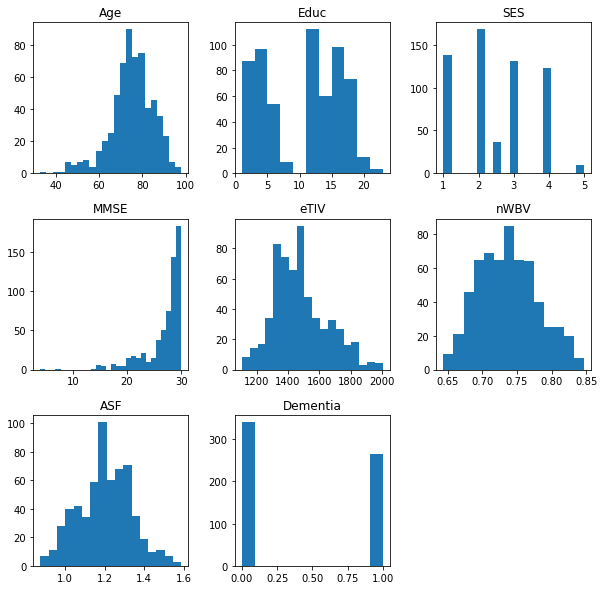

In [147]:
Cross_Long.hist(grid=False, bins='auto',figsize =(10,10))


## Gender

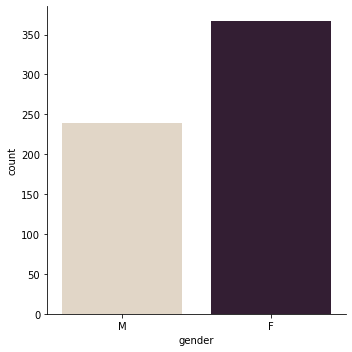

In [148]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=Cross_Long)


In [149]:
Cross_Long[Cross_Long['gender'] =='F'].count()


MRI ID      367
gender      367
Age         367
Educ        367
SES         367
MMSE        367
eTIV        367
nWBV        367
ASF         367
Dementia    367
dtype: int64

In [150]:
Cross_Long[Cross_Long['gender'] =='M'].count()


MRI ID      239
gender      239
Age         239
Educ        239
SES         239
MMSE        239
eTIV        239
nWBV        239
ASF         239
Dementia    239
dtype: int64

### Results: There are 20 % more female than male in the study. 

## Education 

In [151]:
plottepm = Cross_Long.copy(deep=True)

In [152]:
plottepm['Educ'] = pd.cut(plottepm.Educ, [1,5, 12, 16, 19,23], labels=['Elementry', 'High school', 'undergrad', 'grad', 'PhD'])

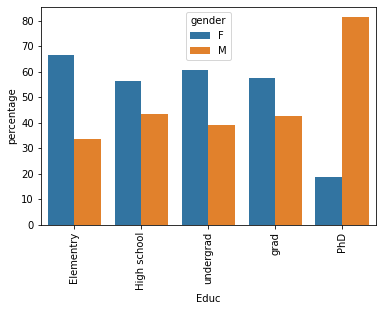

In [153]:
#sns.catplot(x="Educ", hue="gender", kind="count", data=plottepm)


education_counts = (plottepm.groupby(['Educ'])['gender']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Educ'))
p = sns.barplot(x="Educ", y="percentage", hue="gender", data=education_counts)

_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels



### Results: The number of female in each education group below PhD is higher than male, however there are much more male with PhD degree.   

## Socioeconomic status(SES)

Socioeconomic status is an economic and sociological combined total measure of a person's work experience and of an individual's or family's economic access to resources and social position in relation to others. 


In [168]:
plottepm = Cross_Long.copy(deep=True)

In [169]:
plottepm['SES'] = pd.cut(plottepm.SES, [1,2, 3, 5], labels=['Poor', 'Meidum', 'Rich'])

<AxesSubplot:xlabel='SES', ylabel='percentage'>

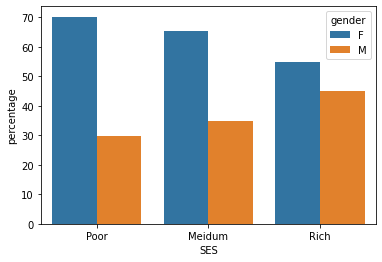

In [170]:

SES_counts = (plottepm.groupby(['SES'])['gender']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('SES'))

sns.barplot(x="SES",y='percentage', hue="gender", data=SES_counts)



### Results: There are more poor female than male in the study. 

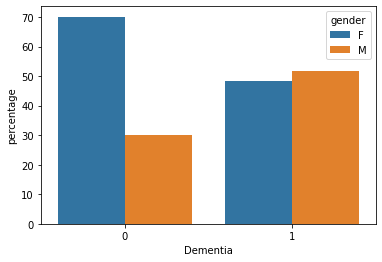

In [167]:
CDR_counts = (Cross_Long.groupby(['Dementia'])['gender']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Dementia'))

p = sns.barplot(x="Dementia", y="percentage", hue="gender", data=CDR_counts)
_ = plt.setp(p.get_xticklabels(), rotation=0)  # Rotate labels




### Results: 40 % percent of subjects sufferers from Dementia


## Investiagting the presence of outliers in data 

/var/folders/y4/r5t9j06x2pb7mk5ptzzbrxjc0000gn/T/ipykernel_39524/3914292557.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Cross_Long_norm = Cross_Long_temp/Cross_Long_temp.mean()


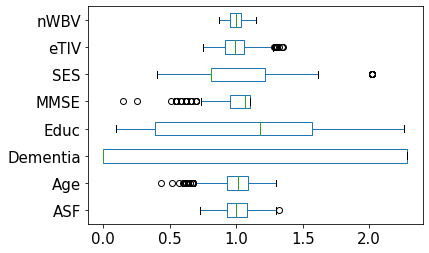

In [172]:
# plotting the normalized features as boxplot 

Cross_Long_temp = Cross_Long.copy(deep=True)
Cross_Long_norm = Cross_Long_temp/Cross_Long_temp.mean()
boxplot = Cross_Long_norm.boxplot(grid=False, vert=False,fontsize=15)

### There is no outlier in the data to be removed.

## Comparing Dementia versus Ctrl subjects



The data were grouped as healthy subject and people with Demential. People with Dementia include all three different level of Dementia,namely CDR > 0

In [174]:
Cross_Long[Cross_Long['Dementia']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,341.0,73.956012,11.445567,33.000,68.000,75.000,82.000,97.000
Educ,341.0,10.521994,6.161332,1.000,4.000,12.000,16.000,23.000
SES,341.0,2.334257,1.050746,1.000,2.000,2.000,3.000,5.000
MMSE,341.0,29.173021,1.007022,25.000,29.000,29.000,30.000,30.000
eTIV,341.0,1468.914956,170.811993,1106.000,1346.000,1445.000,1561.000,2004.000
nWBV,341.0,0.751845,0.043233,0.644,0.720,0.750,0.783,0.847
ASF,341.0,1.210393,0.136034,0.876,1.124,1.215,1.304,1.587
Dementia,341.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000


In [175]:
Cross_Long[Cross_Long['Dementia']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,265.0,76.815094,7.100453,61.000,72.000,77.000000,82.000,98.000
Educ,265.0,9.735849,5.926798,1.000,3.000,12.000000,15.000,20.000
SES,265.0,2.649699,1.124519,1.000,2.000,2.490741,4.000,5.000
MMSE,265.0,24.739623,4.331454,4.000,22.000,26.000000,28.000,30.000
eTIV,265.0,1489.909434,168.493321,1143.000,1365.000,1476.000000,1581.000,1992.000
nWBV,265.0,0.718192,0.033754,0.644,0.694,0.715000,0.742,0.806
ASF,265.0,1.192555,0.131315,0.881,1.110,1.189000,1.286,1.535
Dementia,265.0,1.000000,0.000000,1.000,1.000,1.000000,1.000,1.000


<AxesSubplot:xlabel='Dementia', ylabel='ASF'>

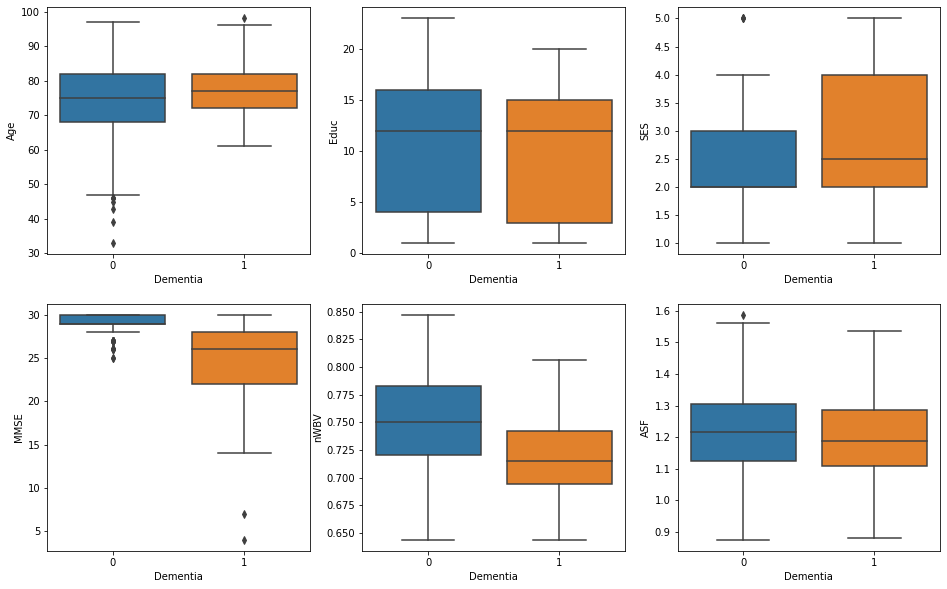

In [177]:
# plotting the box plot for different features for people with Dementia versus healthy people.   

figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10))


sns.boxplot(  x='Dementia', y='Age', data=Cross_Long,   ax=axes[0,0])
sns.boxplot(  x='Dementia', y='Educ', data=Cross_Long, ax=axes[0,1])
sns.boxplot(  x='Dementia', y='SES', data=Cross_Long, ax=axes[0,2])
sns.boxplot(  x='Dementia', y='MMSE', data=Cross_Long,  ax=axes[1,0])
sns.boxplot(  x='Dementia', y='nWBV', data=Cross_Long,  ax=axes[1,1])
sns.boxplot(  x='Dementia', y='ASF', data=Cross_Long, ax=axes[1,2])






In [178]:
stats.ttest_ind(Cross_Long[Cross_Long['Dementia'] ==0]['MMSE'], Cross_Long[Cross_Long['Dementia'] ==1]['MMSE']) 

Ttest_indResult(statistic=18.279746073543986, pvalue=9.575715300889582e-60)

In [179]:
stats.ttest_ind(Cross_Long[Cross_Long['Dementia'] ==0]['Age'], Cross_Long[Cross_Long['Dementia'] ==1]['Age']) 

Ttest_indResult(statistic=-3.567436534810806, pvalue=0.000389068143039792)

In [180]:
stats.ttest_ind(Cross_Long[Cross_Long['Dementia'] ==0]['SES'], Cross_Long[Cross_Long['Dementia'] ==1]['SES']) 

Ttest_indResult(statistic=-3.5547702162080745, pvalue=0.0004078915453463758)

In [181]:
stats.ttest_ind(Cross_Long[Cross_Long['Dementia'] ==0]['nWBV'], Cross_Long[Cross_Long['Dementia'] ==1]['nWBV']) 

Ttest_indResult(statistic=10.437378017272072, pvalue=1.467758321940503e-23)

### Comparing Dementia versus Ctrl subjects: Results


There is a significant difference between ctrl group and Dementia group in following features:
    MMSE,Age, SES, nWBV

| Features | Age | SES | MMSE | nWBV |
|---:|:-------------|:-----------|:------|:------|
|p-value|4.0e-4|4.0e-4|9.6e-60|1.5 e-23

 ## Correlation between features

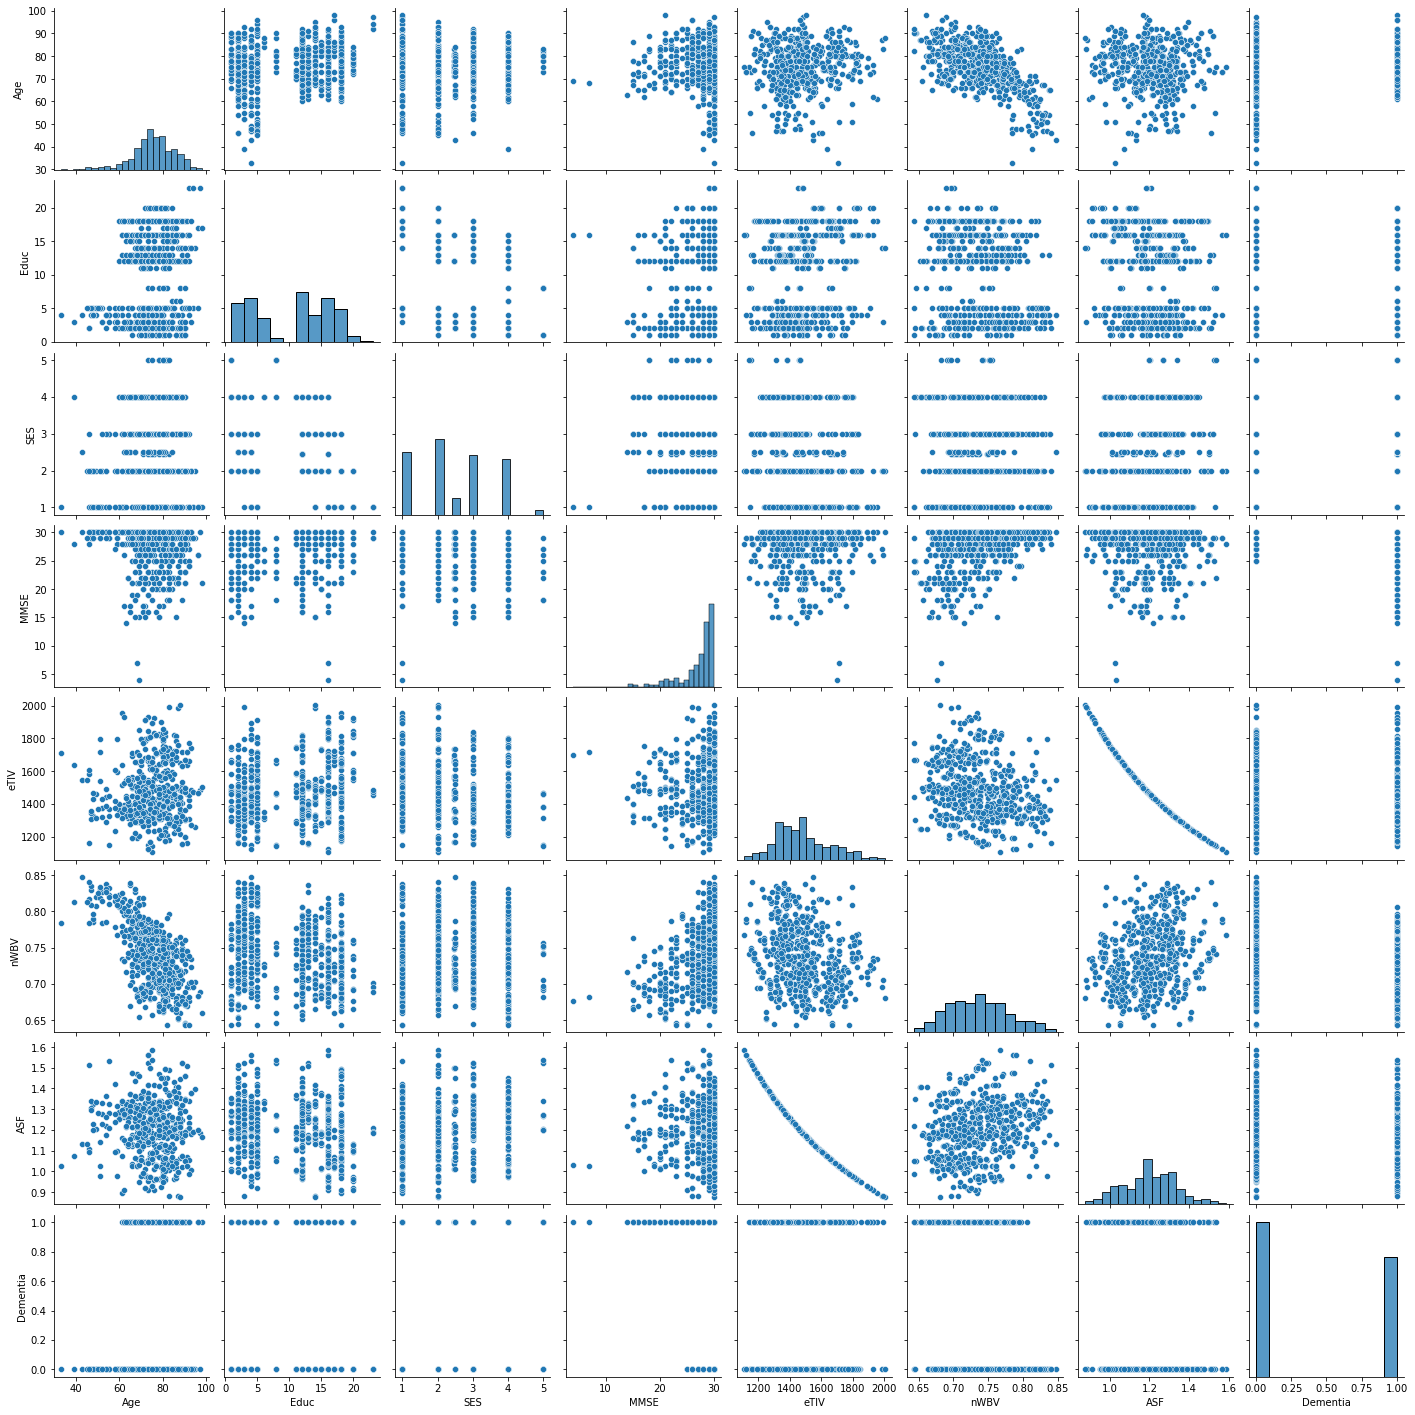

In [182]:
#correlation between whole features 

g = sns.pairplot(Cross_Long)

In [183]:
Cross_Long.columns

Index(['MRI ID', 'gender', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF',
       'Dementia'],
      dtype='object')

/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

Text(0.1, 0.1, 'correlation= -65%')

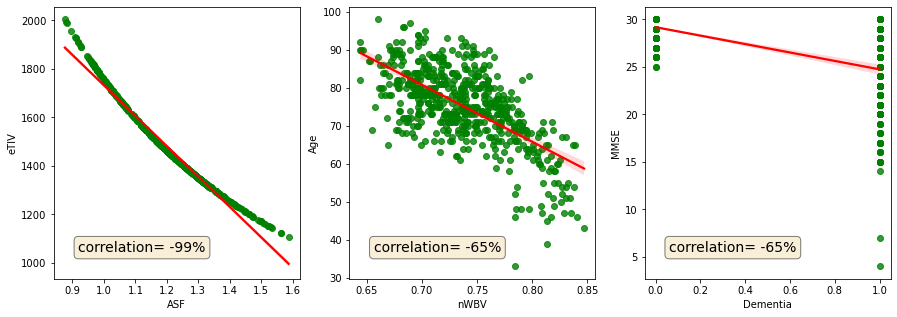

In [184]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.regplot(Cross_Long['ASF'],Cross_Long['eTIV'],scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'}, ax=axes[0])
sns.regplot(Cross_Long['nWBV'],Cross_Long['Age'],scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'}, ax=axes[1])
sns.regplot(Cross_Long['Dementia'],Cross_Long['MMSE'],scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'}, ax=axes[2])


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

axes[0].text(0.10, 0.10, 'correlation= -99%', transform=axes[0].transAxes, fontsize=14,
       multialignment='left',bbox=props)
axes[1].text(0.10, 0.10, 'correlation= -65%', transform=axes[1].transAxes, fontsize=14,
       multialignment='left',bbox=props)
axes[2].text(0.10, 0.10, 'correlation= -65%', transform=axes[2].transAxes, fontsize=14,
       multialignment='left',bbox=props)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Educ'),
  Text(0, 2.5, 'SES'),
  Text(0, 3.5, 'MMSE'),
  Text(0, 4.5, 'eTIV'),
  Text(0, 5.5, 'nWBV'),
  Text(0, 6.5, 'ASF'),
  Text(0, 7.5, 'Dementia')])

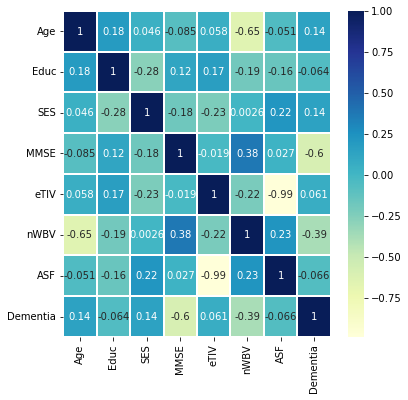

In [185]:
#create the correlation matrix heat map
plt.figure(figsize=(6,6))
sns.heatmap(Cross_Long.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

### Investigating the dependency of correlation to the gender 

In [186]:
Cross_Long_M = Cross_Long[Cross_Long['gender']=='M']
Cross_Long_F = Cross_Long[Cross_Long['gender']=='F']

Text(0.5, 1.0, 'Correlation for Female subjects')

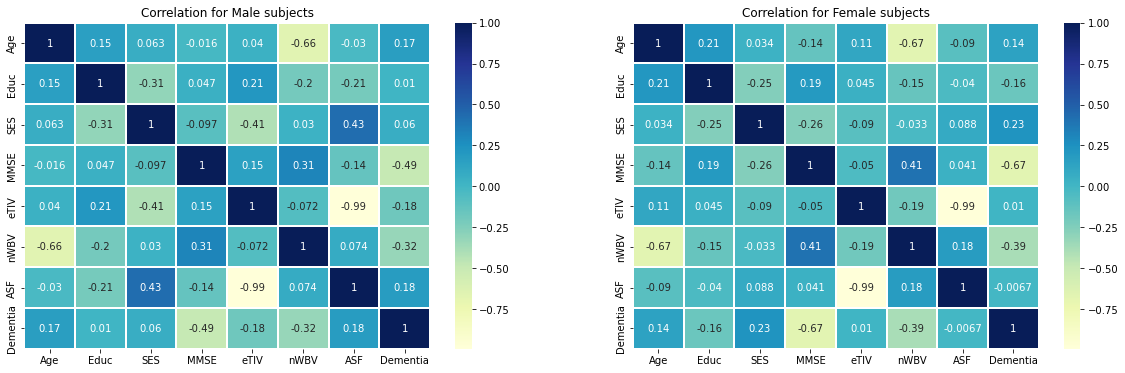

In [187]:
figure, (ax1,ax2) = plt.subplots(1,2, figsize=(20,6))


#sns.boxplot(  x='Dementia', y='Age', data=plottepm,   ax=axes[0,0])
sns.heatmap(Cross_Long_M.corr(),linewidths=.1,cmap="YlGnBu", annot=True ,ax=ax1)
sns.heatmap(Cross_Long_F.corr(),linewidths=.1,cmap="YlGnBu", annot=True ,ax=ax2)
ax1.set_title('Correlation for Male subjects')
ax2.set_title('Correlation for Female subjects')

### Investigating the dependency of correlation to the dementia

In [188]:
Cross_Long_Dem = Cross_Long[Cross_Long['Dementia']>0]
Cross_Long_Ctrl = Cross_Long[Cross_Long['Dementia']==0]

Text(0.5, 1.0, 'Correlation for Ctrl subjects')

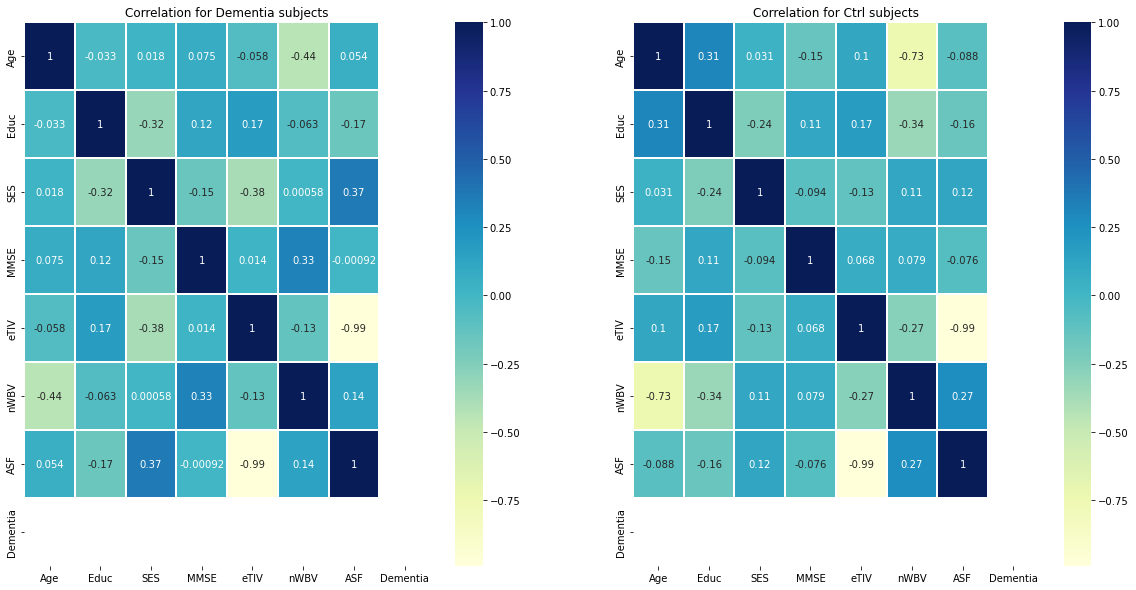

In [189]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))


#sns.boxplot(  x='Dementia', y='Age', data=plottepm,   ax=axes[0,0])
sns.heatmap(Cross_Long_Dem.corr(),linewidths=.1,cmap="YlGnBu", annot=True ,ax=ax1)
sns.heatmap(Cross_Long_Ctrl.corr(),linewidths=.1,cmap="YlGnBu", annot=True ,ax=ax2)
ax1.set_title('Correlation for Dementia subjects')
ax2.set_title('Correlation for Ctrl subjects')

/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.6, 0.9, 'correlation= -44%')

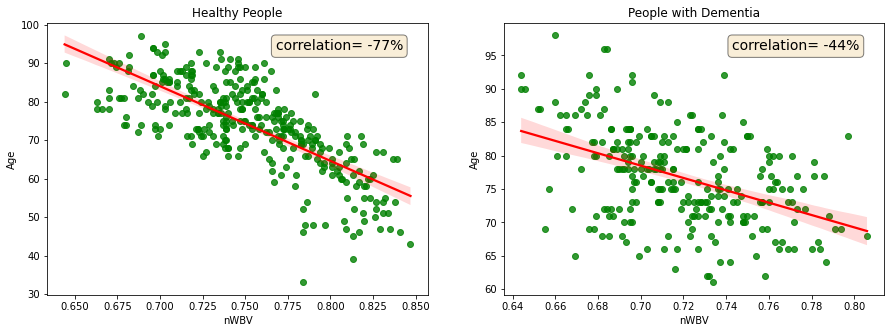

In [190]:
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
sns.regplot(Cross_Long_Ctrl['nWBV'],Cross_Long_Ctrl['Age'],scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'}, ax=axes[0])
sns.regplot(Cross_Long_Dem['nWBV'],Cross_Long_Dem['Age'],scatter_kws = {'color': 'g'}, line_kws = {'color': 'red'}, ax=axes[1])
axes[0].set_title('Healthy People')
axes[1].set_title('People with Dementia')
axes[0].text(0.60, 0.90, 'correlation= -77%', transform=axes[0].transAxes, fontsize=14,
       multialignment='right',bbox=props)
axes[1].text(0.60, 0.90, 'correlation= -44%', transform=axes[1].transAxes, fontsize=14,
       multialignment='right',bbox=props)



### Correlation: results

- There is a very strong negative correlation between ASF&eTIV (corr =-99%)

- There is a significant negative correlation between nWBV&Age and MMSE&CDR (corr ~ -65%)

- Gender does not change the correlation

- Correlation between Age&nWBV was decreased from -73% to -44% in Dementia


# 3. Pre-processing and Training Data Development

### 3.1 create dummy features

In [191]:
Process_data = Cross_Long.copy(deep=True)
Process_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MRI ID    606 non-null    object 
 1   gender    606 non-null    object 
 2   Age       606 non-null    int64  
 3   Educ      606 non-null    float64
 4   SES       606 non-null    float64
 5   MMSE      606 non-null    float64
 6   eTIV      606 non-null    int64  
 7   nWBV      606 non-null    float64
 8   ASF       606 non-null    float64
 9   Dementia  606 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 47.5+ KB


In [192]:
Process_data.drop(columns=['MRI ID'], inplace = True)

In [193]:

dfo=Process_data.select_dtypes(include=['object']) # select object type columns
Process_data = pd.concat([Process_data.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

In [194]:
Process_data.head()

,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,Dementia,gender_F,gender_M
0,87,14.0,2.000000,27.0,1987,0.696,0.883,0,0,1
1,88,14.0,2.000000,30.0,2004,0.681,0.876,0,0,1
2,75,12.0,2.460452,23.0,1678,0.736,1.046,1,0,1
3,76,12.0,2.460452,28.0,1738,0.713,1.010,1,0,1
4,80,12.0,2.460452,22.0,1698,0.701,1.034,1,0,1


### 3.2 Standardize the magnitude of numeric features using a scaler

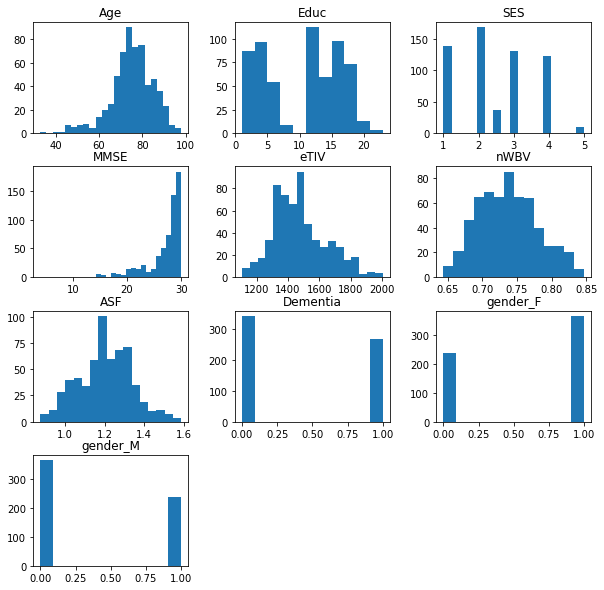

In [196]:
hist = Process_data.hist(bins='auto',figsize =(10,10), grid=False)


In [198]:
scaler = preprocessing.MinMaxScaler()
Process_data[['Age','Educ','SES','MMSE','Dementia','eTIV','nWBV','ASF']] = scaler.fit_transform(Process_data[['Age','Educ','SES','MMSE','Dementia','eTIV','nWBV','ASF']])

In [199]:
Process_data.head()

,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,Dementia,gender_F,gender_M
0,0.830769,0.590909,0.250000,0.884615,0.981069,0.256158,0.009845,0.0,0,1
1,0.846154,0.590909,0.250000,1.000000,1.000000,0.182266,0.000000,0.0,0,1
2,0.646154,0.500000,0.365113,0.730769,0.636971,0.453202,0.239100,1.0,0,1
3,0.661538,0.500000,0.365113,0.923077,0.703786,0.339901,0.188467,1.0,0,1
4,0.723077,0.500000,0.365113,0.692308,0.659243,0.280788,0.222222,1.0,0,1


### 3.3 Creating train-test sets

In [200]:
# creating a data sets to predicit prsence of Dementia
y_dementia = Process_data.pop('Dementia')
X_dementia = Process_data

X_train,X_test,y_train,y_test = train_test_split(X_dementia.index,y_dementia,test_size=0.2, random_state=42)
X_dementia.iloc[X_train] # return dataframe train

,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,gender_F,gender_M
9,0.800000,0.500000,0.750000,1.000000,0.660356,0.300493,0.220816,0,1
227,0.676923,0.772727,0.000000,0.807692,0.554566,0.674877,0.306610,0,1
590,0.384615,0.136364,0.000000,0.884615,0.556793,0.665025,0.305204,0,1
377,0.661538,0.045455,0.372685,0.923077,0.703786,0.369458,0.188467,0,1
132,0.738462,0.772727,0.250000,1.000000,0.621381,0.162562,0.251758,1,0
...,...,...,...,...,...,...,...,...,...
71,0.646154,0.545455,0.750000,0.961538,0.270601,0.660099,0.597750,1,0
106,0.600000,0.500000,0.750000,0.500000,0.419822,0.251232,0.433193,0,1
270,0.753846,0.772727,0.000000,0.961538,0.374165,0.000000,0.479606,1,0
435,0.769231,0.090909,0.750000,0.769231,0.195991,0.753695,0.693390,1,0


# 4. Modeling

## 4.1 Decision tree

In [204]:

X_train, X_test,y_train, y_test = train_test_split(X_dementia,y_dementia, test_size = 0.25, random_state = 246)


### Model 1: Entropy model - no max_depth

              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81        82
         1.0       0.76      0.84      0.80        70

    accuracy                           0.80       152
   macro avg       0.80      0.81      0.80       152
weighted avg       0.81      0.80      0.80       152



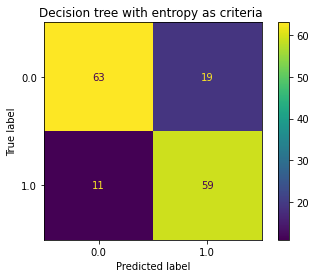

In [221]:
entropy_model = DecisionTreeClassifier(criterion='entropy', random_state = 1234)
entropy_model.fit(X_train, y_train)
y_pred = entropy_model.predict(X_test)

print(classification_report(y_test, y_pred))


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=entropy_model.classes_)
disp.plot()

plt.title('Decision tree with entropy as criteria ')
plt.show()

### Model 2: gini model - no max_depth:

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86        82
         1.0       0.83      0.86      0.85        70

    accuracy                           0.86       152
   macro avg       0.85      0.86      0.85       152
weighted avg       0.86      0.86      0.86       152



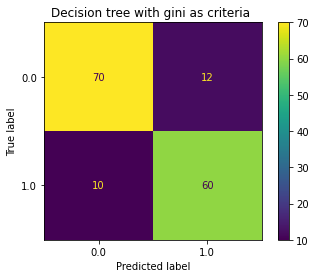

In [223]:

gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state = 1234)
gini_model.fit(X_train, y_train)

y_pred = gini_model.predict(X_test) 


print(classification_report(y_test, y_pred))


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=gini_model.classes_)
disp.plot()
plt.title('Decision tree with gini as criteria ')
plt.show()

### Model 3: Entropy model - grid search

Best Hyperparameters: {'max_depth': 12.0}
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83        82
         1.0       0.79      0.84      0.81        70

    accuracy                           0.82       152
   macro avg       0.82      0.82      0.82       152
weighted avg       0.82      0.82      0.82       152



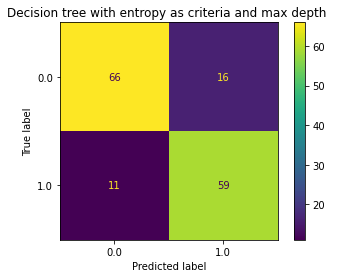

In [244]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
grid={"max_depth":max_depths}
Entropy_maxdepth_model=DecisionTreeClassifier(criterion="entropy",max_depth =grid, random_state = 1234)
Entropy_maxdepth_model_cv=GridSearchCV(Entropy_maxdepth_model,grid,cv=5)
Entropy_maxdepth_model_cv.fit(X_train,y_train)
print('Best Hyperparameters: %s' % Entropy_maxdepth_model_cv.best_params_)

y_pred = Entropy_maxdepth_model_cv.predict(X_test)

print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=Entropy_maxdepth_model_cv.classes_)
disp.plot()
plt.title('Decision tree with entropy as criteria and max depth ')
plt.show()

Best Hyperparameters: {'max_depth': 12.0}
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88        82
         1.0       0.85      0.87      0.86        70

    accuracy                           0.87       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.87      0.87      0.87       152



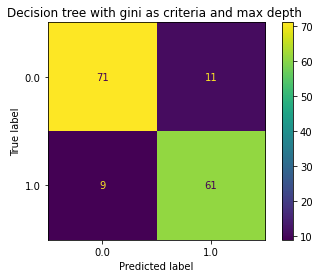

In [227]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
grid={"max_depth":max_depths}
gini_maxdepth_model=DecisionTreeClassifier(criterion="gini",max_depth =grid, random_state = 1234)
gini_maxdepth_model_cv=GridSearchCV(gini_maxdepth_model,grid,cv=5)
gini_maxdepth_model_cv.fit(X_train,y_train)
print('Best Hyperparameters: %s' % gini_maxdepth_model_cv.best_params_)

y_pred = gini_maxdepth_model_cv.predict(X_test)

print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=gini_maxdepth_model_cv.classes_)
disp.plot()
plt.title('Decision tree with gini as criteria and max depth ')
plt.show()

### Decision tree with gini method and maxdepth of 12 has the highest precision and recall. 

## 4.2. Logistic regression 

              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81        82
         1.0       0.83      0.64      0.73        70

    accuracy                           0.78       152
   macro avg       0.79      0.77      0.77       152
weighted avg       0.79      0.78      0.77       152



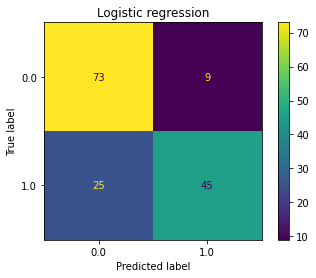

In [229]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=logreg.classes_)
disp.plot()
plt.title('Logistic regression')
plt.show()

/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/masoumeh

/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/masoumeh

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85        82
         1.0       0.87      0.74      0.80        70

    accuracy                           0.83       152
   macro avg       0.84      0.82      0.83       152
weighted avg       0.83      0.83      0.83       152

Best Hyperparameters: {'C': 100, 'max_iter': 200}


/Users/masoumehdehghani/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


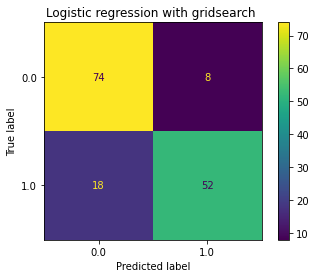

In [243]:
#gridsearch 
Cs = [0.001, 0.1, 1, 10, 100,150,200]

max_iters = [50,100,200,400]

grid={"C":Cs,'max_iter':max_iters}
logreg=LogisticRegression(solver='saga' )
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

y_pred = logreg_cv.predict(X_test)

print(classification_report(y_test, y_pred))

print('Best Hyperparameters: %s' % logreg_cv.best_params_)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=logreg_cv.classes_)
disp.plot()
plt.title('Logistic regression with gridsearch ')
plt.show()



### Logistic Regression with grid search over the strength of regulization(c=100) and iteration number(200) has the higest precision and also also recall compared with linear regression without gridsearch 

## 4.3. Random forest


              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91        82
         1.0       0.91      0.87      0.89        70

    accuracy                           0.90       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.90      0.90      0.90       152



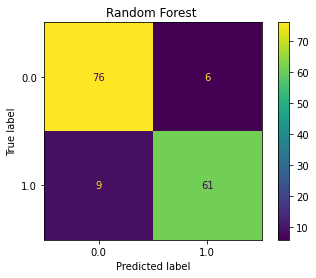

In [263]:
RFC = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)

print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=RFC.classes_)
disp.plot()
plt.title('Random Forest ')
plt.show()






9


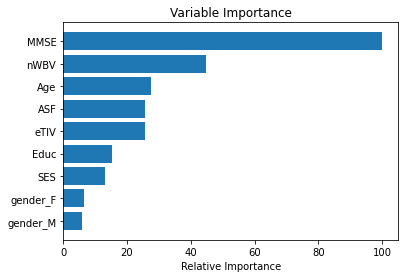

In [266]:
feature_importance = RFC.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, Process_data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## 4.4. Gradient Boosting

 Test multiple learning rates in  gradient boosting classifier:

Best Hyperparameters: {'learning_rate': 0.05}
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86        82
         1.0       0.90      0.74      0.81        70

    accuracy                           0.84       152
   macro avg       0.85      0.83      0.84       152
weighted avg       0.85      0.84      0.84       152



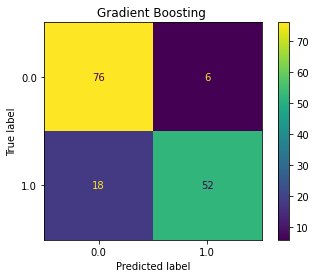

In [269]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1,1.25,1.5,1.75,2]
grid={"learning_rate":learning_rates}
GBC=GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rates, max_features=2, max_depth = 2, random_state = 0)
GBC_cv=GridSearchCV(GBC,grid,cv=5)
GBC_cv.fit(X_train,y_train)

print('Best Hyperparameters: %s' % GBC_cv.best_params_)

y_pred = GBC_cv.predict(X_test)

print(classification_report(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),display_labels=GBC_cv.classes_)
disp.plot()
plt.title('Gradient Boosting ')
plt.show()


# conclusion :

Random forest model resulted in highest accurcay and precision between all models were tried inclduing decision tree, logistic regression, random forest , and gradient Boosting. Since this study was about the diagnosis of Dementia, it is very important to have less false dignosis of Dementia or in other word less false positive. The Random forest results in precision of 91% and recall of 87%.   